<a href="https://colab.research.google.com/github/SLMath/Credit_Score-Analysis/blob/eda_matheus/credit_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Dados

In [216]:
import pandas as pd
import numpy as np

In [217]:
data_df = pd.read_csv('https://github.com/SLMath/Credit_Score-Analysis/raw/main/data/train.csv')
print(data_df.shape)
data_df.head()

(100000, 28)


<ipython-input-217-f5e0b1df3013>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv('https://github.com/SLMath/Credit_Score-Analysis/raw/main/data/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [218]:
aval_df = pd.read_csv('https://github.com/SLMath/Credit_Score-Analysis/raw/main/data/test.csv')
print(aval_df.shape)
aval_df.head()

(50000, 27)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


# EDA

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [220]:
data_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## Verificando dados irrelevantes para a análise

In [221]:
data_df['Customer_ID'].isna().sum()

0

In [222]:
len(data_df['Customer_ID'].unique())

12500

In [223]:
data_df['Customer_ID'].apply(lambda cust_prefix: not re.match('CUS_0x[1-9a-f][0-9a-f]*', cust_prefix)).sum()

0

O "ID" é único para cada registro, portando dispensável.

Como o "Customer_ID", "Name" e "SSN" são redundantes, manteremos apenas "Customer_ID" (verificado que não há nulos).

Vimos que existem 12500 Customers IDs diferentes, todos com prefixo 'CUS_0x' seguido de um hexadecimal

In [224]:
data_df = data_df.drop(columns= ['ID', 'Name', 'SSN'])

In [225]:
# Extraindo e transformando o hexadecimal em int, para melhorar o processamento e armazenamento dos dados
data_df['Customer_ID'] = data_df['Customer_ID'].str[4:].apply(int, base=16)
len(data_df['Customer_ID'].unique())

12500

Não houve perdas de customer ID

## Verificando tipos de dados inconsistentes

In [226]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  object 
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  object 
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   object 
 13  Changed_Credit_Limit      100000 non-null  ob

Os seguintes atributos estão com tipos diferentes do esperado:
- numéricos, tratados como objetos
    - Age
    - Annual_Income
    - Num_of_Loan
    - Num_of_Delayed_Payment
    - Changed_Credit_Limit
    - Outstanding_Debt
    - Credit_History_Age
    - Amount_invested_monthly
    - Monthly_Balance
- inteiro, tratados como float
    - Num_Credit_Inquiries

### Num_Credit_Inquiries

In [227]:
# Verify not int values
pd.Series( value for value in data_df['Num_Credit_Inquiries'] if not value.is_integer() ).unique()

array([nan])

O np.nan impede que a coluna seja int

### Age

In [228]:
# Verify not numerical values
data_df['Age'][ pd.to_numeric(data_df['Age'], errors='coerce', ).isna() ].unique()

array(['28_', '34_', '30_', '24_', '33_', '35_', '31_', '40_', '37_',
       '54_', '21_', '20_', '43_', '38_', '18_', '2111_', '46_', '16_',
       '19_', '47_', '53_', '25_', '27_', '55_', '42_', '48_', '49_',
       '50_', '32_', '22_', '17_', '29_', '15_', '51_', '26_', '39_',
       '14_', '36_', '44_', '7670_', '45_', '23_', '41_', '52_', '733_',
       '5769_', '4383_', '56_', '2650_', '3307_', '6962_', '5589_',
       '6556_', '1447_', '8153_', '3834_', '6744_', '6471_', '7723_',
       '7640_', '6408_', '3502_', '7316_', '1102_', '8669_', '2463_',
       '6666_', '3055_', '1248_', '2220_', '2159_', '4583_', '3988_',
       '2155_', '6770_', '1843_', '1367_', '3742_', '2171_', '5109_',
       '3984_', '2474_', '5046_', '7715_', '2329_', '707_', '844_',
       '2756_', '2037_', '902_', '8523_', '3640_', '3998_', '3712_',
       '2097_', '8348_', '5373_', '3291_', '2994_', '3339_', '2812_',
       '3578_', '3564_', '1794_', '737_', '4301_', '2846_', '2373_',
       '1188_', '8207

In [229]:
# remove "_" at the end and convert to a number
data_df['Age'] = data_df['Age'].str.replace('_', '').astype(int)
data_df['Age']

0         23
1         23
2       -500
3         23
4         23
        ... 
99995     25
99996     25
99997     25
99998     25
99999     25
Name: Age, Length: 100000, dtype: int64

In [230]:
# Apply the same for other columns
remove_underline_cols = [
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Credit_History_Age',
    'Amount_invested_monthly',
    'Monthly_Balance'
]
for col in remove_underline_cols:
    data_df[col] = data_df[col].str.replace('_', '')
    try:
        data_df[col] = data_df[col].apply(float)
    except:
        pass

data_df[remove_underline_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Annual_Income            100000 non-null  float64
 1   Num_of_Loan              100000 non-null  float64
 2   Num_of_Delayed_Payment   92998 non-null   float64
 3   Changed_Credit_Limit     100000 non-null  object 
 4   Outstanding_Debt         100000 non-null  float64
 5   Credit_History_Age       90970 non-null   object 
 6   Amount_invested_monthly  95521 non-null   float64
 7   Monthly_Balance          97132 non-null   float64
dtypes: float64(6), object(2)
memory usage: 6.1+ MB


2 colunas ainda precisam de tratamento:
1. Changed_Credit_Limit
2. Credit_History_Age

### Changed_Credit_Limit

In [231]:
# Verify not numerical values
data_df['Changed_Credit_Limit'][ pd.to_numeric(data_df['Changed_Credit_Limit'], errors='coerce').isna() ].unique()

array([''], dtype=object)

In [232]:
# Tratar dados faltantes como nulos
data_df['Changed_Credit_Limit'] = pd.to_numeric(data_df['Changed_Credit_Limit'], errors='coerce')
data_df['Changed_Credit_Limit']

0        11.27
1        11.27
2          NaN
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 100000, dtype: float64

### Credit_History_Age

In [233]:
# Verify not numerical values
data_df['Credit_History_Age'][ pd.to_numeric(data_df['Credit_History_Age'], errors='coerce', ).isna() ].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

In [234]:
# Verificar o formato:
formato_age = '\d+ Years and \d+ Months'
np.any(
    data_df['Credit_History_Age']\
    .dropna()\
    .apply(lambda value: not re.match(formato_age, value))
)

False

In [235]:
# Transformar texto em numero de meses
def extract_number_months(years_months_str):
    y, m = np.array(years_months_str.split('-')).astype(int)
    return y * 12 + m

# Transform: '{y} Years and {m} Months' into '{y}-{m}', and then apply extract_number_months
data_df['Credit_History_Age'] = data_df['Credit_History_Age']\
    .dropna()\
    .str.replace(' Years and ', '-')\
    .str.replace(' Months', '')\
    .apply(extract_number_months)

data_df['Credit_History_Age']

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

### Month: text to number

In [236]:
# assumindo que todos os dados são do mesmo ano, transformaremos a coluna de meses
# para numerica para permitir ordenação.
# OBS: não usaremos datatime pois ele requer uma data, e não temos ano
mapa_meses = {
    'January' : 1,
    'February' : 2,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6,
    'July' : 7,
    'August' : 8
}

data_df['Month'] = data_df['Month'].map(mapa_meses)
data_df['Month']

0        1
1        2
2        3
3        4
4        5
        ..
99995    4
99996    5
99997    6
99998    7
99999    8
Name: Month, Length: 100000, dtype: int64

## Avaliar comportamento esperado de alguns dados

### Credit_History_Age must follow Month increment for each customer

In [237]:
# auxiliary dataframe to analyse columns difference over time
aux_data = data_df[['Customer_ID']]
aux_data['dif'] = data_df['Credit_History_Age'] - data_df['Month']
aux_data

<ipython-input-237-077589594813>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_data['dif'] = data_df['Credit_History_Age'] - data_df['Month']


,Customer_ID,dif
0,3392,264.0
1,3392,NaN
2,3392,264.0
3,3392,264.0
4,3392,264.0
...,...,...
99995,37932,374.0
99996,37932,374.0
99997,37932,374.0
99998,37932,374.0


In [238]:
# check how many 'dif' non null dif values each customer has
aux_data.dropna().groupby('Customer_ID')['dif'].apply(lambda difs: len(difs.unique())).sort_values()

Customer_ID
1006     1
34234    1
34235    1
34237    1
34238    1
        ..
17737    1
17740    1
17743    1
17648    1
50999    1
Name: dif, Length: 12500, dtype: int64

Todos tem um e apenas um, logo esses dados estão como esperado.
Podemos inclusive preencher todos os valores uma vez que a coluna Month está completa.

In [239]:
# Esse valor foi convertido para unidade meses, então deve incrementar um para cada mes que passa
fill_data = aux_data.groupby('Customer_ID')['dif'].transform(lambda difs: difs.dropna().iloc[0])
fill_data.dropna().groupby(data_df['Customer_ID']).apply(lambda difs: len(difs.unique())).sort_values()

Customer_ID
1006     1
34234    1
34235    1
34237    1
34238    1
        ..
17737    1
17740    1
17743    1
17648    1
50999    1
Name: dif, Length: 12500, dtype: int64

In [240]:
# Esse valor foi convertido para unidade meses, então deve incrementar um para cada mes que passa
data_df['Credit_History_Age'] = data_df['Credit_History_Age'].fillna(fill_data)
data_df[['Customer_ID', 'Month', 'Credit_History_Age']]

,Customer_ID,Month,Credit_History_Age
0,3392,1,265.0
1,3392,2,264.0
2,3392,3,267.0
3,3392,4,268.0
4,3392,5,269.0
...,...,...,...
99995,37932,4,378.0
99996,37932,5,379.0
99997,37932,6,380.0
99998,37932,7,381.0


### Age must vary at most by 1

In [241]:
# check max - min in ages
age_dif_df = data_df.groupby('Customer_ID')['Age'].apply(
    lambda age: age.max() - age.min()
)

# exibir valores inesperados
age_dif_df.sort_values()

Customer_ID
50999       0
37470       0
37475       0
17193       0
37480       0
         ... 
23548    8985
22372    9020
17951    9061
18817    9108
35428    9116
Name: Age, Length: 12500, dtype: int64

In [242]:
# max-min está muito discrepante, vamos transformar em nulos os valores
# impossiveis para idade e refazer a analise
data_df.loc[data_df[data_df['Age'] < 0].index, 'Age'] = np.nan
data_df.loc[data_df[data_df['Age'] > 120].index, 'Age'] = np.nan

# check max - min in ages
age_dif_df = data_df.groupby('Customer_ID')['Age'].agg(
    lambda age: age.max() - age.min()
)

# exibir valores inesperados
age_dif_df.sort_values()

Customer_ID
50999     0.0
39949     0.0
19945     0.0
19944     0.0
39956     0.0
         ... 
7635     71.0
20480    78.0
8620     88.0
22419    88.0
5703     99.0
Name: Age, Length: 12500, dtype: float64

In [243]:
aval_cust = age_dif_df[age_dif_df > 1].index
weird_ages = data_df[data_df['Customer_ID'].apply(lambda id : id in aval_cust)][['Customer_ID', 'Age']]
weird_ages.value_counts().sort_index().to_frame()

0
Customer_ID Age     
3528        51.0   7
            95.0   1
5703        19.0   7
            118.0  1
7635        24.0   7
            95.0   1
8620        27.0   7
            115.0  1
15258       32.0   7
            100.0  1
19300       35.0   7
            102.0  1
20480       33.0   7
            111.0  1
20939       48.0   6
            109.0  1
22419       24.0   4
            25.0   3
            112.0  1
32404       32.0   7
            95.0   1
49738       31.0   7
            99.0   1

In [244]:
# é pressumivel que há valores incongruentes acima de 90
# portanto vamos eliminar esses dados:
data_df.loc[weird_ages[ weird_ages['Age'] > 90 ].index, 'Age'] = np.nan

# check max - min in ages
age_dif_df = data_df.groupby('Customer_ID')['Age'].apply(
    lambda age: age.max() - age.min()
)

# exibir valores inesperados
age_dif_df.sort_values()

Customer_ID
50999    0.0
39949    0.0
39956    0.0
19969    0.0
19966    0.0
        ... 
21832    1.0
21865    1.0
21880    1.0
21812    1.0
25774    1.0
Name: Age, Length: 12500, dtype: float64

In [245]:
# Agora temos os valores como esperado, porém podemos preencher alguns valores:
# Dado um customer, substituiremos nulos se houver um mes antes e um depois com
# o mesmo valor para idade.
def fill_cust_month_gaps(month_data):
    col = month_data.columns[0]

    last_val = last_month = 0
    for idx, (val, month) in month_data.dropna().iterrows():
        if month > last_month + 1 and val == last_val:
            month_data.loc[
                (month_data.Month > last_month) & (month_data.Month < month),
                col
            ] = val
        last_val, last_month = val, month
    return month_data[[col]]

print('before')
display(data_df[data_df.Customer_ID == 22419][['Age', 'Month']])

print()
print('after')
fill_cust_month_gaps(data_df[data_df.Customer_ID == 22419][['Age', 'Month']])

before


,Age,Month
5920,24.0,1
5921,NaN,2
5922,24.0,3
5923,24.0,4
5924,24.0,5
5925,25.0,6
5926,25.0,7
5927,25.0,8



after


,Age
5920,24.0
5921,24.0
5922,24.0
5923,24.0
5924,24.0
5925,25.0
5926,25.0
5927,25.0


In [246]:
data_df['Age'] = data_df['Age'].fillna(
    data_df\
        .groupby('Customer_ID', group_keys=False)[['Age', 'Month']]\
        .apply(fill_cust_month_gaps)\
        ['Age']
)
data_df[data_df.Customer_ID == 22419][['Age', 'Month']]

,Age,Month
5920,24.0,1
5921,24.0,2
5922,24.0,3
5923,24.0,4
5924,24.0,5
5925,25.0,6
5926,25.0,7
5927,25.0,8


### Num_of_Loan and Num_Credit_Inquiries must only increment

In [247]:
# verificando quais customers seguem o esperado
def is_not_monotonic(values):
    for val_ant, val_suc in zip(values, values[1:]):
        if val_ant > val_suc:
            return True
    return False

data_df[
    data_df['Num_of_Loan'].groupby(data_df['Customer_ID']).transform(is_not_monotonic)
][['Customer_ID', 'Month', 'Num_of_Loan']]

,Customer_ID,Month,Num_of_Loan
16,11708,1,3.0
17,11708,2,3.0
18,11708,3,3.0
19,11708,4,3.0
20,11708,5,3.0
...,...,...,...
99987,34304,4,-100.0
99988,34304,5,5.0
99989,34304,6,5.0
99990,34304,7,5.0


In [248]:
# Existe um -100.0
# vamos substituir negativos por null
data_df.loc[data_df['Num_of_Loan'] < 0, 'Num_of_Loan'] = np.nan

# e reavaliar
data_df[
    data_df['Num_of_Loan'].groupby(data_df['Customer_ID']).transform(is_not_monotonic)
][['Customer_ID', 'Month', 'Num_of_Loan']]

,Customer_ID,Month,Num_of_Loan
16,11708,1,3.0
17,11708,2,3.0
18,11708,3,3.0
19,11708,4,3.0
20,11708,5,3.0
...,...,...,...
99851,12360,4,7.0
99852,12360,5,7.0
99853,12360,6,349.0
99854,12360,7,7.0


In [249]:
# Para o customer 12360, há um valor muito discrepante
# Com base nele, vamos trocar os valores isolados:
# Quando houve uma variação maior de 30 unidades por mes (1 por dia),
#   colocaremos nulos no lugar
def change_over30_inc(values):
    col = values.columns[0]

    # ordenar por mes, ignorando os nulos
    values_aux = values.dropna().sort_values('Month', ascending= True)
    # computar a diferença de tempo e de valor, linha a linha
    values_aux = values_aux - values_aux.shift(1)
    # eliminar primeira linha, pois o shift nela é nulo
    values_aux = values_aux.iloc[1:]
    # calculo da taxa de mudanca mensal do valor
    values_aux['change'] = values_aux[col] / values_aux['Month']
    # anular os valores para taxas acima de 30
    values.loc[values_aux[values_aux['change'] > 30].index, col] = np.nan

    return values[[col]]

data_df['Num_of_Loan'] = data_df.groupby(
    data_df['Customer_ID'], group_keys=False
    )[['Num_of_Loan', 'Month']].apply(
        change_over30_inc
        )

# e reavaliar
data_df[
    data_df['Num_of_Loan'].groupby(data_df['Customer_ID']).transform(is_not_monotonic)
][['Customer_ID', 'Month', 'Num_of_Loan']]

,Customer_ID,Month,Num_of_Loan
2008,16982,1,352.0
2009,16982,2,2.0
2010,16982,3,2.0
2011,16982,4,2.0
2012,16982,5,2.0
...,...,...,...
99763,6919,4,1.0
99764,6919,5,1.0
99765,6919,6,NaN
99766,6919,7,1.0


In [250]:
data_df[
    data_df['Num_of_Loan'].groupby(data_df['Customer_ID']).transform(is_not_monotonic)
][['Customer_ID', 'Num_of_Loan']].value_counts().to_frame().sort_index()

0
Customer_ID Num_of_Loan   
1424        2.0          6
            1406.0       1
1606        2.0          7
            1152.0       1
2738        1.0          7
...                     ..
48988       1189.0       1
49049       1.0          7
            1354.0       1
50523       8.0          4
            696.0        1

[142 rows x 1 columns]

In [251]:
pd.concat([
    data_df[data_df['Customer_ID'] == 1424],
    data_df[data_df['Customer_ID'] == 1606],
    data_df[data_df['Customer_ID'] == 50523]
])[['Customer_ID', 'Month', 'Num_of_Loan']]

,Customer_ID,Month,Num_of_Loan
15384,1424,1,1406.0
15385,1424,2,2.0
15386,1424,3,2.0
15387,1424,4,2.0
15388,1424,5,2.0
15389,1424,6,NaN
15390,1424,7,2.0
15391,1424,8,2.0
7600,1606,1,1152.0
7601,1606,2,2.0


In [252]:
# Para esses customers, há um valor muito discrepante no inicio
# Com base nele, vamos trocar os valores isolados:
# Quando houve uma variação maior de 30 unidades por mes (1 por dia),
#   colocaremos nulos no lugar
def change_over30_dec(values):
    col = values.columns[0]

    # ordenar por mes, ignorando os nulos
    values_aux = values.dropna().sort_values('Month', ascending= True)
    # computar a diferença de tempo e de valor, linha a linha
    values_aux = values_aux - values_aux.shift(-1)
    # eliminar ultima linha, pois o shift nela é nulo
    values_aux = values_aux.iloc[:-1]
    # calculo da taxa de mudanca mensal do valor (a diferença no mes ficou negativa)
    values_aux['change'] = - values_aux[col] / values_aux['Month']
    # anular os valores para taxas acima de 30
    values.loc[values_aux[values_aux['change'] > 30].index, col] = np.nan

    return values[[col]]

# change_over30_dec(data_df[data_df['Customer_ID'] == 50523][['Num_of_Loan', 'Month']])

data_df['Num_of_Loan'] = data_df.groupby(
    data_df['Customer_ID'], group_keys=False
    )[['Num_of_Loan', 'Month']].apply(
        change_over30_dec
        )

# e reavaliar
data_df[
    data_df['Num_of_Loan'].groupby(data_df['Customer_ID']).transform(is_not_monotonic)
][['Customer_ID', 'Month', 'Num_of_Loan']]

,Customer_ID,Month,Num_of_Loan
27728,24693,1,3.0
27729,24693,2,3.0
27730,24693,3,23.0
27731,24693,4,3.0
27732,24693,5,3.0
27733,24693,6,3.0
27734,24693,7,3.0
27735,24693,8,3.0
34776,15180,1,6.0
34777,15180,2,6.0


In [253]:
weird_cust = data_df[
    data_df['Num_of_Loan'].groupby(data_df['Customer_ID']).transform(is_not_monotonic)
][['Customer_ID', 'Month', 'Num_of_Loan']]

weird_cust.pivot(
    index= 'Month',
    columns= 'Customer_ID',
    values= 'Num_of_Loan'
)

Customer_ID,5559,15180,24693,25080,27175,46210
Month,,,,,,
1,3.0,6.0,3.0,NaN,2.0,19.0
2,3.0,6.0,3.0,9.0,2.0,1.0
3,3.0,6.0,23.0,9.0,2.0,1.0
4,3.0,6.0,3.0,9.0,2.0,1.0
5,NaN,31.0,3.0,23.0,2.0,1.0
6,3.0,6.0,3.0,9.0,2.0,1.0
7,17.0,6.0,3.0,9.0,29.0,1.0
8,3.0,6.0,3.0,9.0,2.0,1.0


In [254]:
# Os demais valores acima de 15 parecem tambem erros
# Vamos eliminá-los
def remove_high_values(values):
    if is_not_monotonic(values):
        values.loc[values > 15] = np.nan
    return values

data_df['Num_of_Loan'] = data_df['Num_of_Loan'].groupby(
    data_df['Customer_ID'], group_keys=False
    ).transform(remove_high_values)
data_df[data_df['Customer_ID'] == 5559][['Customer_ID', 'Month', 'Num_of_Loan']]

,Customer_ID,Month,Num_of_Loan
72888,5559,1,3.0
72889,5559,2,3.0
72890,5559,3,3.0
72891,5559,4,3.0
72892,5559,5,NaN
72893,5559,6,3.0
72894,5559,7,NaN
72895,5559,8,3.0


In [255]:
# tambem podemos aplicar aqui o tratamento dado a Age,
# substituindo os nulos entre dois valores iguais
data_df['Num_of_Loan'].isna().sum()

4342

In [256]:
data_df['Num_of_Loan'] = data_df['Num_of_Loan'].fillna(
    data_df\
        .groupby('Customer_ID', group_keys=False)[['Num_of_Loan', 'Month']]\
        .apply(fill_cust_month_gaps)\
        ['Num_of_Loan']
)
data_df['Num_of_Loan'].isna().sum()

1116

In [257]:
# Repetindo tudo para Num_Credit_Inquiries...
# vamos substituir negativos por null
data_df.loc[data_df['Num_Credit_Inquiries'] < 0, 'Num_Credit_Inquiries'] = np.nan

# Eliminar valores extrapolantes
data_df['Num_Credit_Inquiries'] = data_df.groupby(
    data_df['Customer_ID'], group_keys=False
    )[['Num_Credit_Inquiries', 'Month']].apply(
        change_over30_inc
        )

data_df['Num_Credit_Inquiries'] = data_df.groupby(
    data_df['Customer_ID'], group_keys=False
    )[['Num_Credit_Inquiries', 'Month']].apply(
        change_over30_dec
        )

# e avaliar
weird_cust = data_df[
    data_df['Num_Credit_Inquiries'].groupby(data_df['Customer_ID']).transform(is_not_monotonic)
][['Customer_ID', 'Month', 'Num_Credit_Inquiries']]

weird_cust.pivot(
    index= 'Month',
    columns= 'Customer_ID',
    values= 'Num_Credit_Inquiries'
)

Customer_ID,8635,12836,14190,19486,19695,23744,30587,35397
Month,,,,,,,,
1,4.0,4.0,3.0,6.0,1.0,12.0,6.0,10.0
2,4.0,4.0,31.0,6.0,1.0,29.0,9.0,15.0
3,4.0,4.0,3.0,6.0,1.0,12.0,32.0,31.0
4,4.0,NaN,3.0,6.0,31.0,12.0,9.0,15.0
5,4.0,34.0,3.0,6.0,2.0,12.0,9.0,15.0
6,32.0,4.0,6.0,33.0,2.0,12.0,9.0,15.0
7,4.0,4.0,6.0,6.0,NaN,12.0,9.0,15.0
8,4.0,4.0,6.0,6.0,2.0,12.0,9.0,15.0


In [258]:
# Os demais valores acima de 15 parecem tambem erros
# Vamos eliminá-los
data_df['Num_Credit_Inquiries'] = data_df['Num_Credit_Inquiries'].groupby(
    data_df['Customer_ID'], group_keys=False
    ).transform(remove_high_values)

data_df[data_df['Customer_ID'] == 35397][['Customer_ID', 'Month', 'Num_Credit_Inquiries']]

,Customer_ID,Month,Num_Credit_Inquiries
75280,35397,1,10.0
75281,35397,2,15.0
75282,35397,3,NaN
75283,35397,4,15.0
75284,35397,5,15.0
75285,35397,6,15.0
75286,35397,7,15.0
75287,35397,8,15.0


In [259]:
# tambem podemos aplicar aqui o tratamento dado a Age,
# substituindo os nulos entre dois valores iguais
data_df['Num_Credit_Inquiries'].isna().sum()

3610

In [260]:
data_df['Num_Credit_Inquiries'] = data_df['Num_Credit_Inquiries'].fillna(
    data_df\
        .groupby('Customer_ID', group_keys=False)[['Num_Credit_Inquiries', 'Month']]\
        .apply(fill_cust_month_gaps)\
        ['Num_Credit_Inquiries']
)
data_df['Num_Credit_Inquiries'].isna().sum()

1287

## Explorando e Visualizando dados

In [261]:
data_df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [262]:
data_df.drop(columns= ['Customer_ID', 'Month']).describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,98950.0,NaN,NaN,NaN,33.316928,10.768911,14.0,24.0,33.0,42.0,56.0
Occupation,100000,16,_______,7062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000.0,NaN,NaN,NaN,176415.701298,1429618.051414,7005.93,19457.5,37578.61,72790.92,24198062.0
Monthly_Inhand_Salary,84998.0,NaN,NaN,NaN,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,17.09128,117.404834,-1.0,3.0,6.0,7.0,1798.0
Num_Credit_Card,100000.0,NaN,NaN,NaN,22.47443,129.05741,0.0,4.0,5.0,7.0,1499.0
Interest_Rate,100000.0,NaN,NaN,NaN,72.46604,466.422621,1.0,8.0,13.0,20.0,5797.0
Num_of_Loan,98884.0,NaN,NaN,NaN,3.536932,2.817469,0.0,2.0,3.0,5.0,439.0
Type_of_Loan,88592,6260,Not Specified,1408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delay_from_due_date,100000.0,NaN,NaN,NaN,21.06878,14.860104,-5.0,10.0,18.0,28.0,67.0


### Age

<Axes: xlabel='Age', ylabel='Count'>

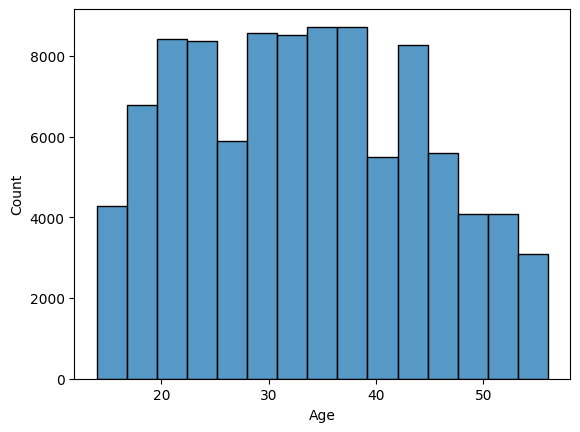

In [263]:
# Agora sim podemos ver a distribuição das idades
sns.histplot(data= data_df, x= 'Age', bins= 15)

Apresenta uma distribuição quase uniforme, com as bordas arredondadas

# Valor inesperado em Occupation

In [ ]:
data_df.Occupation.value_counts()

In [ ]:
data_df[data_df.Occupation == "_______"].groupby('Customer_ID')['Occupation'].size().sort_values()

In [ ]:
pd.concat([
    data_df[data_df.Customer_ID == 40551],
    data_df[data_df.Customer_ID == 31179],
    data_df[data_df.Customer_ID == 32252]
])

In [ ]:
# Podemos corrigir com base no customer_id tambem
data_df['Occupation'] = data_df.Occupation.replace("_______", np.nan)
data_df['Occupation'] = data_df['Occupation'].fillna(
    data_df.groupby('Customer_ID')['Occupation'].transform(lambda occup: occup.dropna().iloc[0])
)

pd.concat([
    data_df[data_df.Customer_ID == 40551],
    data_df[data_df.Customer_ID == 31179],
    data_df[data_df.Customer_ID == 32252]
])

In [ ]:
# verificar todos os customers tem a mesma profissão
data_df[['Customer_ID', 'Occupation']].groupby(['Customer_ID', 'Occupation']).size().sort_values()

In [ ]:
# Como possuem, so nos resta analisar um grafico de barras de contagem
_= (data_df['Occupation'].value_counts() / 8).sort_values(ascending= True).plot.barh()

Os cargos apresentam uma distribuição quase uniforme.

### Annual_Income

In [ ]:
# possui um valor máximo muito elevado, vamos investigar outliers
data_df['Annual_Income'].plot.box()

In [ ]:
# Apararentemente há uma grande quantidade de valores muito elevados
data_df['Annual_Income'].plot.box()


### Tratando valores multiplos na coluna Type_of_Loan

In [ ]:
data_df['Type_of_Loan'].unique()

## Tratar Dados Nulos

Verificar contagem de dados nulos (faltantes/NaN)

In [ ]:
na_data = data_df.isna().sum()
na_data[na_data > 0]

In [ ]:
print(f'porcentagem de dados nulos: { na_data.sum() / len(data_df) :.1%}')
print(f'porcentagem de registros com algum dado nulo: { np.any(data_df.isna(), axis= 1).sum() / len(data_df) :.1%}')

Como a porcentagem de registros é muita alta, vamos tentar preencher dados nulos.

Seguiremos a ordem das colunas pela contagem de nulos.


#### Monthly_Inhand_Salary

In [ ]:
# Monthly_Inhand_Salary might be filled with data from same customer
len( data_df.dropna(subset= 'Monthly_Inhand_Salary')['Customer_ID'].unique() )

In [ ]:
# Since all 12500 have at least a single not null value, we can use this value to
# estimate the missing data

# Primeiro, tentamos preencher os dados com o valor encontrado no mes anterior, mas
# isso pode falhar caso o primeiro mes esteja nulo
fill_salary_forward = data_df.sort_values('Month').groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(
    lambda salary_group: salary_group.fillna(method= 'ffill')
).sort_index()
filled_salary = data_df['Monthly_Inhand_Salary'].fillna(fill_salary_forward)

filled_salary[filled_salary.isna()]

In [ ]:
# analyze these data, to see if they were unemployed or some other reason for missing data
data_df[fill_salary_forward.isna()]

In [ ]:
# since Annual_Income is a valid value, let's procced using backward propagation
fill_salary_backward = data_df.sort_values('Month').groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(
    lambda salary_group: salary_group.fillna(method= 'bfill')
).sort_index()
filled_salary = filled_salary.fillna(fill_salary_backward)

filled_salary[filled_salary.isna()]

In [ ]:
data_df['Monthly_Inhand_Salary'] = filled_salary
data_df['Monthly_Inhand_Salary'].isna().sum()

#### Changed_Credit_Limit

In [ ]:
# Verifica quantos customers tem pelo menos um valor de 'Changed_Credit_Limit'
len( data_df.dropna(subset= 'Changed_Credit_Limit')['Customer_ID'].unique() )

In [ ]:
# Como todos possuem, podemos analisar os valores para entender como melhor preenche-los
data_df.query('Changed_Credit_Limit.isnull()').groupby('Customer_ID')['Changed_Credit_Limit'].size().sort_values(ascending= False)

In [ ]:
# caso exemplo 1
data_df[data_df['Customer_ID'] == 28666].Changed_Credit_Limit

In [ ]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 46029].Changed_Credit_Limit

In [ ]:
# caso exemplo 3
data_df[data_df['Customer_ID'] == 18325].Changed_Credit_Limit

In [ ]:
# vamos substituir nulos pela moda
data_df['Changed_Credit_Limit'] = data_df['Changed_Credit_Limit'].fillna(
    data_df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(
        lambda limits: limits.value_counts().index[0]
    )
)
data_df['Changed_Credit_Limit'].isna().sum()

In [ ]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 46029].Changed_Credit_Limit

In [ ]:
# caso exemplo 3
data_df[data_df['Customer_ID'] == 18325].Changed_Credit_Limit

#### Amount_invested_monthly

In [ ]:
# Verifica quantos customers tem pelo menos um valor de 'Changed_Credit_Limit'
len( data_df.dropna(subset= 'Amount_invested_monthly')['Customer_ID'].unique() )

In [ ]:
# Como todos possuem, podemos analisar os valores para entender como melhor preenche-los
data_df.query('Amount_invested_monthly.isnull()').groupby('Customer_ID')['Amount_invested_monthly'].size().sort_values(ascending= False)

In [ ]:
# caso exemplo 1
data_df[data_df['Customer_ID'] == 40980].Amount_invested_monthly

In [ ]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 41073].Amount_invested_monthly

In [ ]:
# caso exemplo 3
data_df[data_df['Customer_ID'] == 50999].Amount_invested_monthly

In [ ]:
# Como os valores tem alguns extremos, usaremos a mediana por ser mais robusta que
# a média quanto a outliers
data_df['Amount_invested_monthly'] = data_df['Amount_invested_monthly'].fillna(
    data_df.sort_values('Month')\
    .groupby('Customer_ID')\
    ['Amount_invested_monthly']\
    .transform('median')
)

In [ ]:
# caso exemplo 1
data_df[data_df['Customer_ID'] == 40980].Amount_invested_monthly

In [ ]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 41073].Amount_invested_monthly

In [ ]:
# caso exemplo 3
data_df[data_df['Customer_ID'] == 50999].Amount_invested_monthly

#### Monthly_Balance

In [ ]:
# Verifica quantos customers tem pelo menos um valor de 'Changed_Credit_Limit'
len( data_df.dropna(subset= 'Monthly_Balance')['Customer_ID'].unique() )

In [ ]:
# Nem todos possuem, mas podemos analisar os valores para entender como melhor preenche-los
# Primeiro os que possuem algum dado
missing_monthly_balance = data_df.query('Monthly_Balance.isnull()').groupby('Customer_ID')['Monthly_Balance'].size().sort_values(ascending= False)
missing_monthly_balance[missing_monthly_balance < 8]

In [ ]:
# caso exemplo 1
data_df[data_df['Customer_ID'] == 4744].Monthly_Balance

In [ ]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 23199].Monthly_Balance

In [ ]:
# Como os valores também tem alguns extremos, usaremos a mediana por ser mais robusta que
# a média quanto a outliers
data_df['Monthly_Balance'] = data_df['Monthly_Balance'].fillna(
    data_df.sort_values('Month')\
    .groupby('Customer_ID')\
    ['Monthly_Balance']\
    .transform('median')
)

In [ ]:
# Agora os sem dados
data_df.merge(missing_monthly_balance[missing_monthly_balance == 8], on= 'Customer_ID')

Nao observamos nada util, mas podemos seguir com algumas abordagens:
- inputar a mediana/média do valor da coluna
- inputar a mediana/média com base em grupos, por exemplo pela Occupation
- remover essas linhas
- remover a coluna

Como essas linhas representam menos de 2% dos dados, vamos optar por eliminá-las.

#### Using Customer_ID to fill "customer-constante" columuns


In [ ]:
# Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries can be set the same way
cust_cte_cols = ['Type_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']
for col in cust_cte_cols:
    print(col, len( data_df.dropna(subset= col)['Customer_ID'].unique() ))

Type_of_Loan não vai ser completamente preenchida, mas as outras duas sim


In [ ]:
cust_cte_fill_forward = data_df.sort_values('Month').groupby('Customer_ID')[cust_cte_cols].transform(
    lambda salary_group: salary_group.fillna(method= 'ffill')
).sort_index()
filled_cust_cte_cols = data_df[cust_cte_cols].fillna(cust_cte_fill_forward)
filled_cust_cte_cols.isna().sum()

In [ ]:
cust_cte_fill_backward = data_df.sort_values('Month').groupby('Customer_ID')[cust_cte_cols].transform(
    lambda salary_group: salary_group.fillna(method= 'bfill')
).sort_index()
filled_cust_cte_cols = filled_cust_cte_cols.fillna(cust_cte_fill_backward)
filled_cust_cte_cols.isna().sum()

In [ ]:
data_df[cust_cte_cols] = filled_cust_cte_cols

#### Type_of_Loan

In [ ]:
# Verificar se houve um número positivos de emprestimo para os dados vazios em Type_of_Loan
data_df.query('Type_of_Loan.isnull()')['Num_of_Loan'].unique()

# sep1

In [ ]:
# Como existe um tipo de empréstimo "Not Specified", vamos usar esse tipo nos
# casos em que houve algum empréstimo, mas estão com tipo nulo
not_specified_loans = data_df.query('Num_of_Loan > 0')['Type_of_Loan'].fillna("Not Specified")
data_df['Type_of_Loan'] = data_df['Type_of_Loan'].fillna(not_specified_loans)

data_df.query('Type_of_Loan.isnull()')['Num_of_Loan'].unique()

In [ ]:
data_df[tipos_emprestimo] = data_df['Type_of_Loan'].dropna().apply(
    lambda valor:
        pd.Series([
            tipo in valor for tipo in tipos_emprestimo
        ], index= tipos_emprestimo)
).astype(int)
data_df = data_df.drop(columns= 'Type_of_Loan')

data_df[tipos_emprestimo]

In [ ]:
tipos_emprestimo = np.unique([
    texto
    for lista_texto in pd.Series(data_df['Type_of_Loan'].dropna().unique())\
        .str.replace(', and', ',')\
        .str.split(', ')
    for texto in lista_texto
])
tipos_emprestimo

# Modelos